### Opdracht 
We gaan proberen om een voorspelling te doen over de uitslag van een (verkleinde) voetbalpool om te zien wie er waarschijnlijk gaat winnen. We gaan deze voorspelling doen aan de hand van de  Random Number Generator en het principe vanMonte Carlo Simulatie.

Maak een Monte Carlo Simulatie die meerdere keren (duizenden) de competitie speelt met gebruik van deze tabel van kansen. Hoe vaker je een competitie speelt, hoe nauwkeuriger je voorspelling wordt. Houd bij hoeveel punten elk team scoort in de competitie (3 punten voor winst, 1 punt voor gelijk, 0 voor verlies), en maak een overzicht (ranking) van de teams.

<img src = "tabelMC.PNG">

In [1]:
import pandas as pd
import numpy as np
import math

Zet bovenstaande tabel om in een dictionary

## Lineair Congruential method

Een functie maken waar we willekeurige getallen genereren op basis van de Linear congruential method.
De formule voor de Linear Congruential method luid als volgt: <br>
**X n+1 = (a * Xn + c) mod m**
waar
* a= multiplier
* c = increment
* Xn als n = 0 => seed (starting value)
* m = modulus


In [2]:
class LCR:
    
    def __init__(self, a, c, m, seed):
        self.a = a
        self.c = c
        self.m = m
        self.seed = seed
        
    def random_number_generator(self):
        "Generating a random number using linear congruential method " 
        next_seed = (self.a * self.seed + self.c) % self.m
        self.seed = next_seed 
        return next_seed % 100 # convert to number between 0 -99
    
    def randdec(self):
        "Convert generated randomn number in to a decimal number"
        return self.random_number_generator()/100 # convert to number between 0 and 1
    


#### Example if the Linear congruential method 
The parameters in defined LCR object would be used to for our Monte Carlo problem.

In [3]:
rng = LCR(1664525, 1013904223, 2 ** 32,  20200420162000)
lst = []
for i in range(100):
    lst.append(rng.random_number_generator())

In [4]:
import matplotlib.pyplot as plt

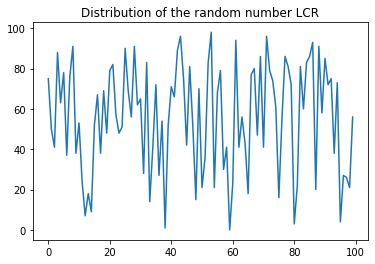

In [5]:
plt.title("Distribution of the random number LCR") #TODO
plt.plot(lst)

## Middle square 

#TODO beschrijving hier zettten 

In [6]:
class MiddleSquare:
    
    def __init__(self, seed):
        self.size = len(str(seed)) 
        self.seed = seed
        
        
    def random_number_generator(self):
        "Generating random number using middle square method"
        x = str(self.seed**2)
        if len(x) != (self.size*2):
            x = x.zfill(self.size*2)
        
        y= int(self.size/2)
        self.seed = int(x[y: y + self.size]) 
        return self.seed
        
    def randdec(self):
        "Convert random number in to a decimal number"
        return self.random_number_generator()/10**self.size
    

#### Example of the Middle Square method

In [7]:
mds = MiddleSquare(675248)

In [8]:
for _ in range(10):
    print(mds.random_number_generator())

959861
333139
981593
524817
432883
387691
304311
605184
247673
341914


Definieer een spel tussen 2 teams. <br>
De scores luidt als volgt:
* 3 punten voor winst
* 1 punt voor gelijk spel
* 0 punten voor verlies

## Verdiepende opdracht

In [9]:
class Team:
  
    def __init__(self,name, average_home_score, average_home_conceded,average_away_score ,average_away_conceded, prob_list_teams):
        self.name = name
        self.ahs = average_home_score
        self.ahc = average_home_conceded
        self.aas = average_away_score
        self.aac = average_away_conceded
        self.prob_list_teams = prob_list_teams
        
        
        self.score = 0 # houd de score bij van de team
        self.doelsaldo = 0
    


In [10]:
class Tournament:
    
    def __init__(self, rng):
        self.teams = []
        self.rng = rng
    
    def add_teams(self, team):
        self.teams.append(team)
        
    def gemiddelde_thuis_scoort(self):
        sum_ahs = 0
        for team in self.teams:
            sum_ahs += team.ahs
        
        return sum_ahs/len(self.teams)
    
    def gemiddelde_thuis_toegegeven(self):
        sum_ahc = 0
        for team in self.teams:
            sum_ahc += team.ahc
        
        return sum_ahc/len(self.teams)
    
    def gemiddelde_uit_scoort(self):
        sum_aas = 0
        for team in self.teams:
            sum_aas += team.aas
        
        return sum_aas/len(self.teams)
    
    def gemiddelde_uit_toegegeven(self):
        sum_aac = 0
        for team in self.teams:
            sum_aac += team.aac
        
        return sum_aac/len(self.teams)
    
    def thuis_aanvalskracht(self, thuisploeg): # 'Attack Strength'
            return thuisploeg.ahs/ self.gemiddelde_thuis_scoort()
    
    def uit_aanvalskracht(self, tegenstander): # 'Attack Strength'
            return tegenstander.aas/ self.gemiddelde_uit_scoort()
    
    def thuis_verdedigingskracht(self, thuisploeg): # 'Defense Strength'
            return thuisploeg.ahc/ self.gemiddelde_thuis_toegegeven()
    
    def uit_verdedigingskracht(self, tegenstander): # 'Defense Strength'
            return tegenstander.aac/ self.gemiddelde_uit_toegegeven()
    
    def thuis_doelpunten(self, thuisploeg, tegenstander):
        return self.thuis_aanvalskracht(thuisploeg) * self.uit_verdedigingskracht(tegenstander) * self.gemiddelde_thuis_scoort()
    
    def uit_doelpunten(self, thuisploeg, tegenstander):
        return self.uit_aanvalskracht(thuisploeg) * self.thuis_verdedigingskracht(tegenstander) * self.gemiddelde_uit_scoort()
        
    def poisson_verdeling(self, expected_occurences, discrete_events):
        # https://towardsdatascience.com/the-poisson-distribution-and-poisson-process-explained-4e2cb17d459
        #TODO verandert var namen naar NL 
        return math.e**(-expected_occurences) * ((expected_occurences**discrete_events)/math.factorial(discrete_events))
    
    
    def match_outcome(self,thuisploeg, tegenstander):
        random_number = self.rng.randdec() # pakt random getal
        kans_doelpunten_verdeling = 0
        r = 20
        for x in range(r+1):
            # kiko ta e chens between 0-0, 0-1, 1-0, 1-1
            for y in range(r+1):
                thuis_kans_doelpunt = self.poisson_verdeling(self.thuis_doelpunten(thuisploeg, tegenstander), x)
                uit_kans_doelpunt   = self.poisson_verdeling(self.uit_doelpunten(thuisploeg, tegenstander), y)
                
                kans_doelpunten_verdeling += thuis_kans_doelpunt * uit_kans_doelpunt
                
                if random_number <= kans_doelpunten_verdeling:
                    return x, y
                
    def wedstrijden_verdiepend(self):
        for home_team in self.teams: # for each team , each team will play as hometeam
            for away_team in self.teams:# get the list of the restof the teams -> oponents/away_teams
                if home_team.name != away_team.name:
                    ht_point, at_point = self.match_outcome(home_team, away_team) # pakt de punten                    
                    
                    home_team.doelsaldo += ht_point - at_point
                    away_team.doelsaldo += at_point - ht_point
                    
                    if ht_point > at_point:
                        home_team.score += 3
                    elif ht_point < at_point:
                        away_team.score += 3
                    else: # ht_points == at_points
                        home_team.score += 1
                        away_team.score += 1
    
    
    def wedstrijden_prob_list(self):
         for home_team in self.teams: # for each team , each team will play as hometeam
            for away_team in self.teams:# get the list of the restof the teams -> oponents/away_teams
                if home_team.name != away_team.name:
                    random_number = self.rng.randdec()  #  pakt random getal
#                     print( home_team.prob_list_teams[away_team.name])
                    prob_lst = list(map(lambda x: x/100, home_team.prob_list_teams[away_team.name]))
#                     print(prob_lst)
                    
                    if  random_number < prob_lst[2]: # rn < 18 , dan verlies thuisspelende partij
                        away_team.score += 3
                    elif random_number < (prob_lst[2] + prob_lst [1]): # rn zit tussen 18 en  35 (18+17), dan is er een gelijkspel
                        home_team.score += 1
                        away_team.score += 1
                    else: # rn zit tussen 35 en 100 (35 + 65), dan win de thuisspelende partij
                        home_team.score += 3 
    
    def rankings(self):
        return reversed(sorted(self.teams, key =lambda x : (x.score,x.doelsaldo)))

    def reset(self):
        for i in self.teams:
            i.doelsaldo = 0
            i.score = 0
    
    

Maak Monte carlo functie die de functie championships n keren draait en de resultaten opslaan in average_ranks

In [11]:
def MC(n, rng, choice):
    # generate dict of average ranking of the teams
    average_ranks = {}
    
    t = Tournament(rng)
    t.teams.append(Team("ajax", 3.2, 0.9, 3.1, 0.6, 
                        {"feyenoord":[65,17,18], "psv":[54,21,25], "fcutrecht":[74,14,12], "willemII":[78,13,9]}))
    t.teams.append(Team("feyenoord", 2.4, 1.1, 2.2, 0.8, 
                       {"ajax": [30,21,49], "psv":[37,24,39], "fcutrecht":[51,22,27], "willemII":[60,21,19]}))
    t.teams.append(Team("psv", 2.1, 0.7, 1.8, 1.3, 
                       {"ajax": [39,22,39], "feyenoord":[54,22,24], "fcutrecht":[62,20,18], "willemII": [62,22,16]}))
    t.teams.append(Team("fcutrecht", 1.9, 1.2, 3, 2.4,
                      {"ajax":[25,14,61], "feyenoord": [37,23,40], "psv":[29,24,47], "willemII": [53,23,25]} ))
    t.teams.append(Team("willemII", 1.4, 1.7, 1, 1.5,
                        {"ajax": [17, 18, 65], "feyenoord":[20,26,54], "psv":[23,24,53], "fcutrecht":[37,25,38]}))
    
    for team in t.teams:
        average_ranks[team.name] = {}
        for pos in range(1, len(t.teams)+1):
            average_ranks[team.name][pos] = 0
    
    for i in range(0, n):
        if choice == 1:
            t.wedstrijden_prob_list()
        else:
            t.wedstrijden_verdiepend()
        
        pos = 1
        for team in t.rankings():
            average_ranks[team.name][pos] +=1
            pos+=1
        
        t.reset()
            
        
    return average_ranks

In [12]:
n = 1000
res = MC(n, rng, 1)
res

{'ajax': {1: 548, 2: 265, 3: 104, 4: 62, 5: 21},
 'feyenoord': {1: 137, 2: 228, 3: 258, 4: 235, 5: 142},
 'psv': {1: 250, 2: 307, 3: 249, 4: 138, 5: 56},
 'fcutrecht': {1: 52, 2: 134, 3: 242, 4: 300, 5: 272},
 'willemII': {1: 13, 2: 66, 3: 147, 4: 265, 5: 509}}

In [13]:
res_ = MC(n, rng,2)
res_

{'ajax': {1: 265, 2: 270, 3: 276, 4: 143, 5: 46},
 'feyenoord': {1: 355, 2: 299, 3: 227, 4: 98, 5: 21},
 'psv': {1: 41, 2: 99, 3: 223, 4: 425, 5: 212},
 'fcutrecht': {1: 4, 2: 26, 3: 50, 4: 222, 5: 698},
 'willemII': {1: 335, 2: 306, 3: 224, 4: 112, 5: 23}}

 Zet dictionaries om in een dataframe 

In [14]:
df = pd.DataFrame(res)
def calculate_probability(x):
    return (x / n )*100 
df2 = df.apply(np.vectorize(calculate_probability))
print("Amount of competition that each team has had to get to that place.")
display(df)
print("Probability of each team getting to that place in a competition.")
display(df2)

Amount of competition that each team has had to get to that place.


,ajax,feyenoord,psv,fcutrecht,willemII
1,548,137,250,52,13
2,265,228,307,134,66
3,104,258,249,242,147
4,62,235,138,300,265
5,21,142,56,272,509


Probability of each team getting to that place in a competition.


,ajax,feyenoord,psv,fcutrecht,willemII
1,54.8,13.7,25.0,5.2,1.3
2,26.5,22.8,30.7,13.4,6.6
3,10.4,25.8,24.9,24.2,14.7
4,6.2,23.5,13.8,30.0,26.5
5,2.1,14.2,5.6,27.2,50.9


Elke wedstrijd heeft een plaats in het eindklassement (rangschikking 1e, 2e, 3e, 4e en 5e). De waarschijnlijkheid dat een team een ​​specifieke plaats behaalt in de laatste klassering = het aantal keren dat het team op een specifieke plaats is geclassificeerd / totaal aantal competities in een kampioenschap.

In onze Monte carlo-functie voeren we n kampioenschappen uit. <br>
**x** = het aantal keren dat het team op een specifieke plaats is geclassificeerd<br>
**n** = het aantal iteratie van je MC<br>
De kans zal zijn **x/n**


In [16]:
df2_ = pd.DataFrame(res_).apply(np.vectorize(calculate_probability))
display(df2_)

,ajax,feyenoord,psv,fcutrecht,willemII
1,26.5,35.5,4.1,0.4,33.5
2,27.0,29.9,9.9,2.6,30.6
3,27.6,22.7,22.3,5.0,22.4
4,14.3,9.8,42.5,22.2,11.2
5,4.6,2.1,21.2,69.8,2.3
